 # Assignment1 Part1 EDA                 

# NYC SUBWAY WEATHER DATA SET

The NYC subway weather consists of 27 column and 42629 rows of data. It provides the information of NYC subway weather during the period of May 2015. It provides temperature, rain, pressure and their mean along with latitude and longitutde classified bassed on the UNIT and station. It also provided the entries and exists with respect to date and time in hours.

With this data set we could analyze what variables are related to subway ridership. Also find the pattern in the weather. Inorder to do so we need to clean the data and identify bad data if any exists.


IMPORT DATA FROM CSV

In [1]:
#standard
import numpy as np
import pandas as pd
from numpy.random import randn

#stats
from scipy import stats

#plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
%matplotlib inline

In [3]:
#import from csv
nyc_sub = pd.read_csv('C:/Users/aswat/nyc_subway_weather.csv')

In [4]:
nyc_sub.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,5/1/2011,0:00:00,4388333,2911002,0.0,0.0,5/1/2011 0:00,0.0,6.0,...,30.22,0.0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,5/1/2011,4:00:00,4388333,2911002,0.0,0.0,5/1/2011 4:00,4.0,6.0,...,30.25,0.0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,5/1/2011,12:00:00,4388333,2911002,0.0,0.0,5/1/2011 12:00,12.0,6.0,...,30.28,0.0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,5/1/2011,16:00:00,4388333,2911002,0.0,0.0,5/1/2011 16:00,16.0,6.0,...,30.26,0.0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,5/1/2011,20:00:00,4388333,2911002,0.0,0.0,5/1/2011 20:00,20.0,6.0,...,30.28,0.0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


SUMMARY STATISTICS

In [5]:
nyc_sub.describe()

,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,day_week,weekday,latitude,longitude,fog,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
count,4.264900e+04,4.264900e+04,42647.000000,42647.000000,42647.000000,42647.000000,42648.000000,42648.000000,42648.000000,42648.000000,...,42648.000000,42647.000000,42647.000000,42647.000000,42647.000000,42647.000000,42647.000000,42647.000000,42647.000000,42647.000000
mean,2.812486e+07,1.986993e+07,1886.648862,1361.523859,10.046381,2.905691,0.714430,40.724648,-73.940366,0.009825,...,29.971095,0.224752,63.103735,6.927711,0.004618,29.971097,63.103968,6.927782,40.728558,-73.938698
std,3.043607e+07,2.028986e+07,2952.441710,2183.890279,6.938864,2.079250,0.451691,0.071650,0.059712,0.098632,...,0.137943,0.417424,8.455722,4.510216,0.016345,0.131159,6.939119,3.179879,0.065421,0.059581
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,40.576152,-74.073622,0.000000,...,29.550000,0.000000,46.900000,0.000000,0.000000,29.590000,49.400000,0.000000,40.600204,-74.014870
25%,1.039762e+07,7.613712e+06,274.000000,237.000000,4.000000,1.000000,0.000000,40.677107,-73.987342,0.000000,...,29.890000,0.000000,57.000000,4.600000,0.000000,29.913333,58.283333,4.816667,40.688591,-73.985130
50%,1.818389e+07,1.331609e+07,905.000000,664.000000,12.000000,3.000000,1.000000,40.717241,-73.953459,0.000000,...,29.960000,0.000000,61.000000,6.900000,0.000000,29.958000,60.950000,6.166667,40.720570,-73.949150
75%,3.263049e+07,2.393771e+07,2255.500000,1537.000000,16.000000,5.000000,1.000000,40.759123,-73.907733,0.000000,...,30.060000,0.000000,69.100000,9.200000,0.000000,30.060000,67.466667,8.850000,40.755226,-73.912033
max,2.357746e+08,1.493782e+08,32814.000000,34828.000000,20.000000,6.000000,1.000000,40.889185,-73.755383,1.000000,...,30.320000,1.000000,86.000000,23.000000,0.157500,30.293333,79.800000,17.083333,40.862064,-73.694176


Based on on the statistic one could figure out that their exists no outliers. For example the value of entries, exists respresent number of people which does not goes below zero. This shows that data has no outliers. 

MISSING VALUES

In [6]:
# using lambda
nyc_sub.apply(lambda x: sum(x.isnull()),axis=0)

UNIT               0
DATEn              0
TIMEn              0
ENTRIESn           0
EXITSn             0
ENTRIESn_hourly    2
EXITSn_hourly      2
datetime           1
hour               2
day_week           2
weekday            1
station            1
latitude           1
longitude          1
conds              1
fog                1
precipi            1
pressurei          1
rain               2
tempi              2
wspdi              2
meanprecipi        2
meanpressurei      2
meantempi          2
meanwspdi          2
weather_lat        2
weather_lon        2
dtype: int64

In [7]:
# using is function
nyc_sub.isnull().sum()

UNIT               0
DATEn              0
TIMEn              0
ENTRIESn           0
EXITSn             0
ENTRIESn_hourly    2
EXITSn_hourly      2
datetime           1
hour               2
day_week           2
weekday            1
station            1
latitude           1
longitude          1
conds              1
fog                1
precipi            1
pressurei          1
rain               2
tempi              2
wspdi              2
meanprecipi        2
meanpressurei      2
meantempi          2
meanwspdi          2
weather_lat        2
weather_lon        2
dtype: int64

REMOVE OR IMPUTE BAD DATA

Since the bad data is comprised of NAN values with more than 60 percent in a row. The best option is to remove them.

Method 1 : By capturing finite numbers

In [8]:
df = nyc_sub[np.isfinite(nyc_sub['hour'])]

In [9]:
#data farame with no missing values
df.apply(lambda x: sum(x.isnull()),axis=0)

UNIT               0
DATEn              0
TIMEn              0
ENTRIESn           0
EXITSn             0
ENTRIESn_hourly    0
EXITSn_hourly      0
datetime           0
hour               0
day_week           0
weekday            0
station            0
latitude           0
longitude          0
conds              0
fog                0
precipi            0
pressurei          0
rain               0
tempi              0
wspdi              0
meanprecipi        0
meanpressurei      0
meantempi          0
meanwspdi          0
weather_lat        0
weather_lon        0
dtype: int64

Method 2: Drop the NA values.

This requires the data to be copied to a new dataframe inorder to save the orginal data

In [10]:
df1 = nyc_sub.copy()
#drop rows with NA
df1.dropna(inplace = True)
df1.apply(lambda x: sum(x.isnull()),axis=0)

UNIT               0
DATEn              0
TIMEn              0
ENTRIESn           0
EXITSn             0
ENTRIESn_hourly    0
EXITSn_hourly      0
datetime           0
hour               0
day_week           0
weekday            0
station            0
latitude           0
longitude          0
conds              0
fog                0
precipi            0
pressurei          0
rain               0
tempi              0
wspdi              0
meanprecipi        0
meanpressurei      0
meantempi          0
meanwspdi          0
weather_lat        0
weather_lon        0
dtype: int64

Count and Mean of coulmns

In [11]:
df1['precipi'].value_counts()

0.00    39825
0.01      792
0.21      457
0.02      445
0.03      284
0.06      268
0.08      224
0.07      154
0.15      152
0.05       23
0.30       23
Name: precipi, dtype: int64

In [12]:
df1['precipi'].mean()

0.004617909817806681

# Calculating Correlation

We could use Peasrson's R to find the correlation among the variable
First we have to standardize each variable
Then multiply each pairof values, and take the average. Here we have to take uncorrected standard deviation by passing ddof=0.

In [13]:
def correlation(x,y):
    std_x = (x- x.mean()) / x.std(ddof=0)
    std_y = (y- y.mean()) / y.std(ddof=0)
    
    return (std_x * std_y).mean()

In [14]:
print correlation(df1['ENTRIESn_hourly'], df1['meanprecipi'])
print correlation(df1['ENTRIESn_hourly'], df1['ENTRIESn'])

0.0356431031941
0.58589161064


This relation is positive. Hence the enteries increases with precipitation. But this value is not strong. Next we compare the entries hourly with total number of entries accumalated through hours, which is strong and evidently shows us that number of entries increases with hours.

# Riders by Day

Using the group by option to find the rider by day. The graph depicts that the number of drivers during the week day increases and decrease along the weekends.

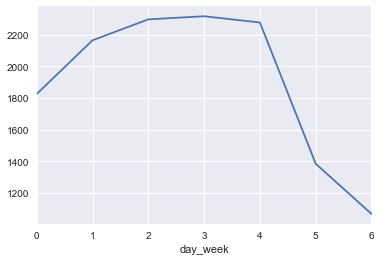

In [15]:
rider_by_day = df1.groupby('day_week').mean()['ENTRIESn_hourly']
rider_by_day.plot()

# Ridership based on Latitude and Longitutde

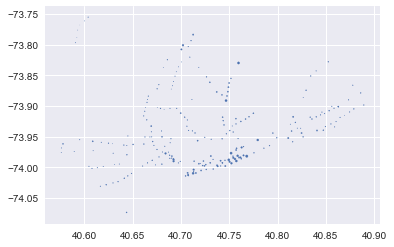

In [16]:
data_location = df1.groupby(['latitude','longitude'],as_index=False).mean()
#increase the size based on the entries
#creating a scaled value
entries = (data_location['ENTRIESn_hourly']/ data_location['ENTRIESn_hourly'].std()) 
plt.scatter(data_location['latitude'],data_location['longitude'],s=entries)

The dark bubbles illustrates the huge amount riders along some parts of NY

# Histograms

These plots are used to represent the how the data is distributed along a particular axis. The graph below shows us about precipitation and  temperature where one could in infer that a precipitation are in high numbers between 0 to 0.05. Similarly temperature are in high numbers between 55F to 60 F. The later join plot shows the ditrinution of temperature with hour. The hex attribute enables us to find the termperature which repeats a lot or in high numbers

(array([  4.10620000e+04,   3.07000000e+02,   6.46000000e+02,
          0.00000000e+00,   0.00000000e+00,   1.52000000e+02,
          0.00000000e+00,   4.57000000e+02,   0.00000000e+00,
          2.30000000e+01]),
 array([ 0.  ,  0.03,  0.06,  0.09,  0.12,  0.15,  0.18,  0.21,  0.24,
         0.27,  0.3 ]),
 <a list of 10 Patch objects>)

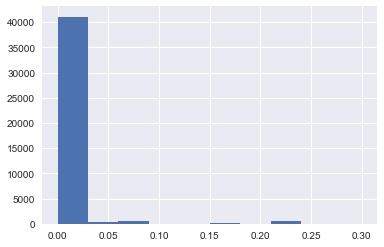

In [17]:
plt.hist(df1['precipi'])

(array([ 0.00789806,  0.02820394,  0.05369723,  0.04918148,  0.03317546,
         0.02831788,  0.02814996,  0.00786208,  0.0156402 ,  0.00362819]),
 array([ 46.9 ,  50.81,  54.72,  58.63,  62.54,  66.45,  70.36,  74.27,
         78.18,  82.09,  86.  ]),
 <a list of 10 Patch objects>)

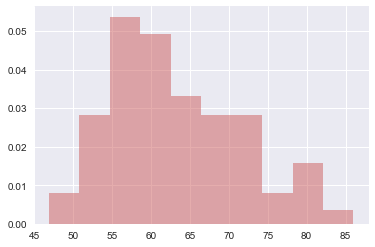

In [18]:
plt.hist(df1['tempi'],normed=True,color='indianred',alpha=0.5)

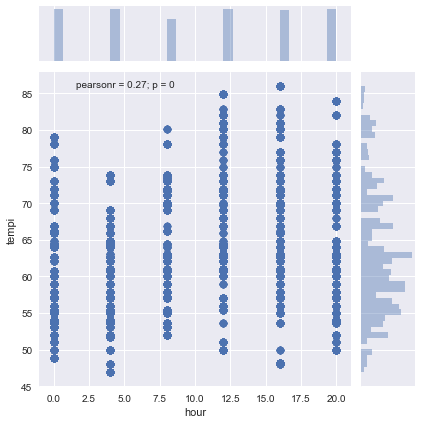

In [19]:
sns.jointplot(df1['hour'],df1['tempi'])

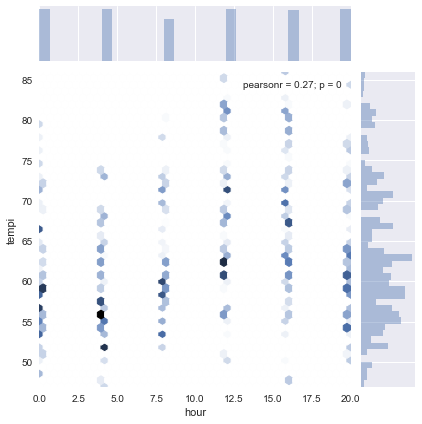

In [20]:
sns.jointplot(df1['hour'],df1['tempi'],kind='hex')

# Kernel Density Estimates

The Kernel Density estimates(KDE) provides a non parametric way to estimate the probability density function of a randomn variable. It is used on the training dataset which increases in size. The graph provides information that the pdf is higher among 55F to 60F

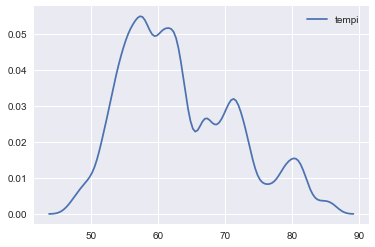

In [21]:
sns.kdeplot(df1['tempi'])

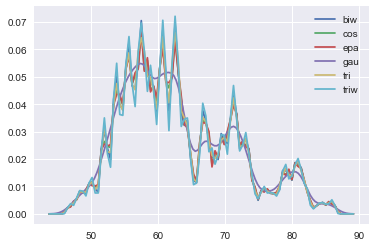

In [22]:
# non parametric statistics(includes mean, variance)

Kernel_options = ['biw','cos','epa','gau','tri','triw']

for kern in Kernel_options:
    sns.kdeplot(df1['tempi'],kernel=kern,label=kern)

# Cumalative Distribution Function

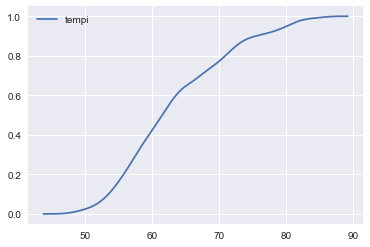

In [23]:
#probability of vaiable x in a distribution

sns.kdeplot(df1['tempi'],cumulative=True)

# Combined Plots

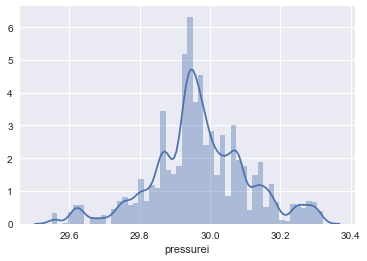

In [24]:
sns.distplot(df1['pressurei'])

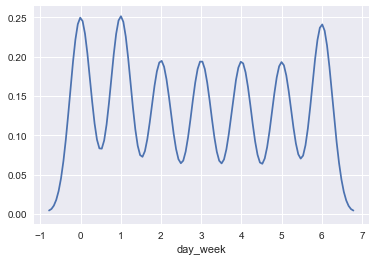

In [25]:
sns.distplot(df1['day_week'],hist=False)

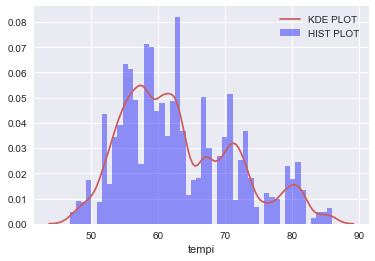

In [26]:
sns.distplot(df1['tempi'], 
            kde_kws={'color':'indianred','label':'KDE PLOT'},
            hist_kws={'color':'blue','label':'HIST PLOT'})

# Box Plots

The summary of an individual column could be found using the Box plot.

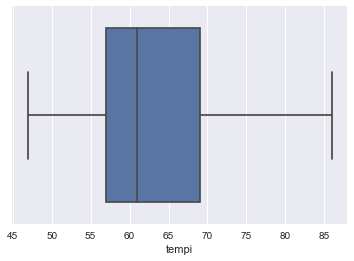

In [27]:
sns.boxplot(df1['tempi'],whis=np.inf)

This shows us that the mean of temperature is 62. A large amount temperature varies between 57 to 69.

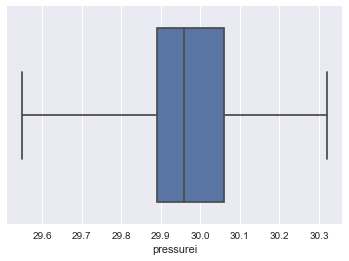

In [28]:
sns.boxplot(df1['pressurei'],whis=np.inf)

This shows us that the mean of pressure is 29.96. A large amount presure varies between 29.8 to 30.06.

The below plots provides the outliers which exists among the day_week with respect to that of precipitation

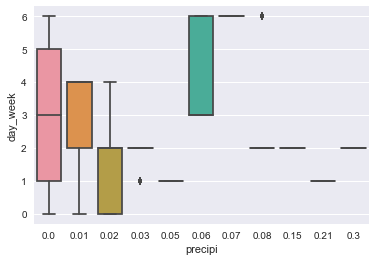

In [53]:
sns.boxplot(x=df1['precipi'],y=df1['day_week'],whis=np.inf)

Inorder to get a full picture we need use KDE which is got with violin plot(box plot with KDE)

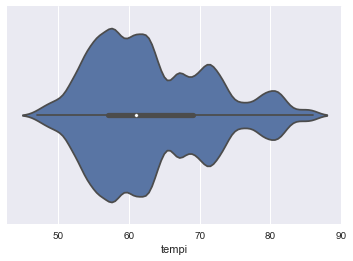

In [31]:
sns.violinplot(df1['tempi'])

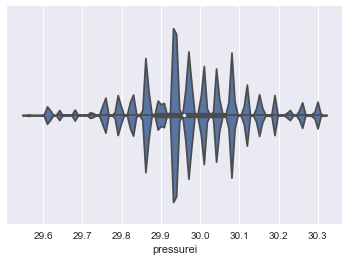

In [32]:
sns.violinplot(df1['pressurei'],bw=0.01)

In [33]:
#provides similar graphs to rugplot
#sns.violinplot(df1['pressurei'],inner='stick')

# Regression Plots

Pressure with respective to temperature
the plot provides use a scatter plot of temperature with respect to that of pressure along with the linear regression fit which is accross 30 to 29 accross the pressure and temperature

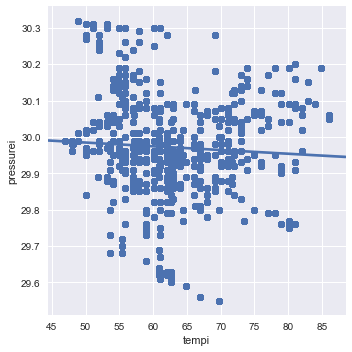

In [34]:
sns.lmplot('tempi','pressurei',df1)

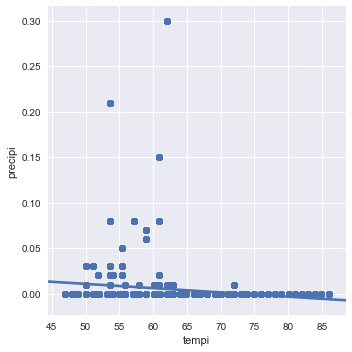

In [35]:
# precipitation with respective to temperature
sns.lmplot('tempi','precipi',df1)

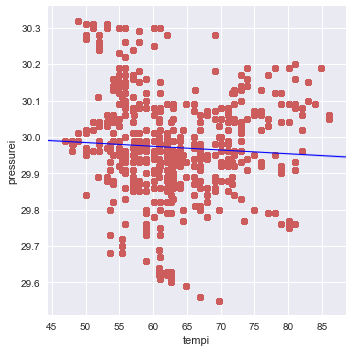

In [36]:
#line fit
sns.lmplot('tempi','pressurei',df1,
          scatter_kws={'marker':'o','color':'indianred'},
          line_kws={'linewidth':1,'color':'blue' })

 polynomial fits of 4th order

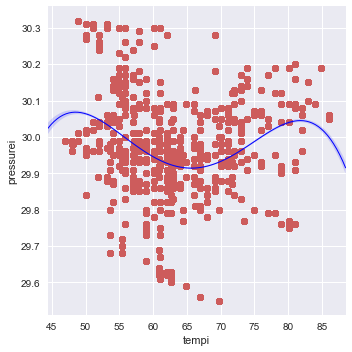

In [37]:
sns.lmplot('tempi','pressurei',df1,order=4,
          scatter_kws={'marker':'o','color':'indianred'},
          line_kws={'linewidth':1,'color':'blue' })


Removing the fits

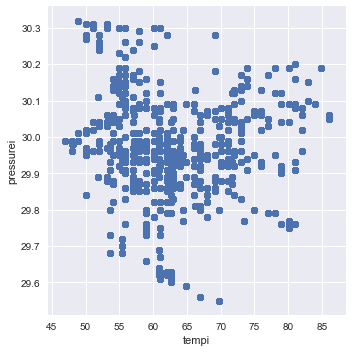

In [38]:
sns.lmplot('tempi','pressurei',df1,fit_reg=False)

Percentage of pressure

In [39]:
pressure_total = df1['pressurei'].sum()
print pressure_total

1278177.45


In [40]:
df1['pressure_percent']=100*(df1['pressurei']/pressure_total)

In [41]:
df1.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon,pressure_percent
0,R003,5/1/2011,0:00:00,4388333,2911002,0.0,0.0,5/1/2011 0:00,0.0,6.0,...,0.0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177,0.002364
1,R003,5/1/2011,4:00:00,4388333,2911002,0.0,0.0,5/1/2011 4:00,4.0,6.0,...,0.0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177,0.002367
2,R003,5/1/2011,12:00:00,4388333,2911002,0.0,0.0,5/1/2011 12:00,12.0,6.0,...,0.0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177,0.002369
3,R003,5/1/2011,16:00:00,4388333,2911002,0.0,0.0,5/1/2011 16:00,16.0,6.0,...,0.0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177,0.002367
4,R003,5/1/2011,20:00:00,4388333,2911002,0.0,0.0,5/1/2011 20:00,20.0,6.0,...,0.0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177,0.002369


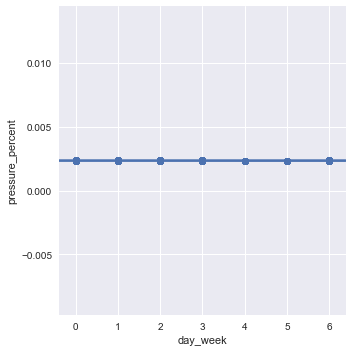

In [42]:
sns.lmplot('day_week','pressure_percent',df1)

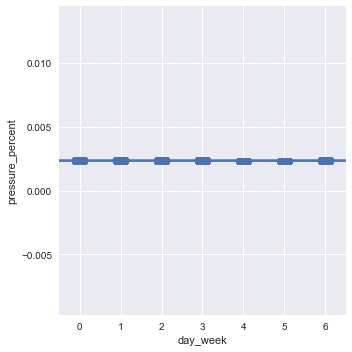

In [43]:
sns.lmplot('day_week','pressure_percent',df1,x_jitter=.1)

estimate of tendency of each bin which could be done in percent. The estimate provides is the variation which is determined by the default functionality

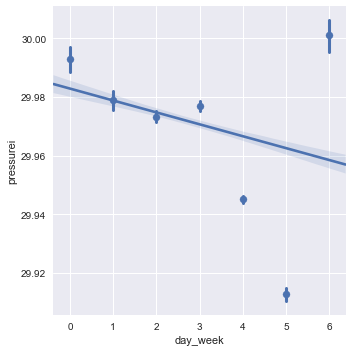

In [44]:
sns.lmplot('day_week','pressurei',df1,x_estimator=np.mean)

Setting hue

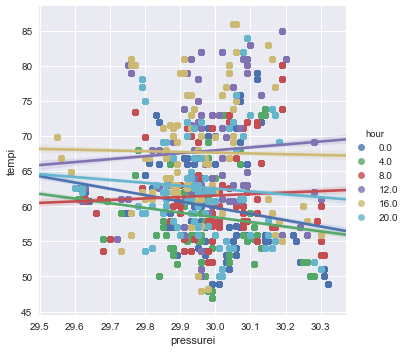

In [45]:
sns.lmplot('pressurei','tempi',df1,hue='hour')

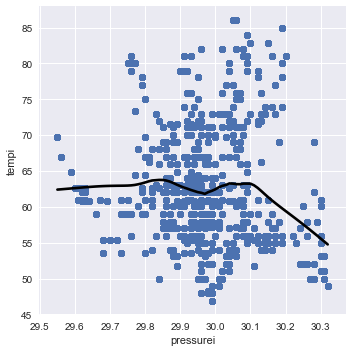

In [46]:
#local regression
sns.lmplot('pressurei','tempi',df1,lowess=True,line_kws={'color':'black'})

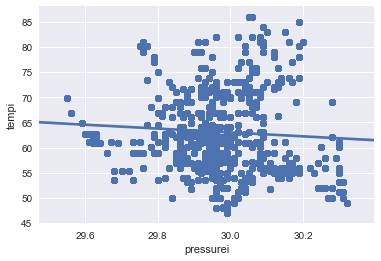

In [47]:
#reg plot
sns.regplot('pressurei','tempi',df1)

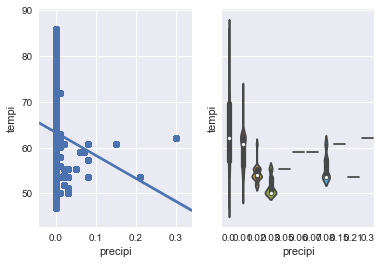

In [48]:
fig, (axis1,axis2) = plt.subplots(1,2,sharey=True)
sns.regplot('precipi','tempi',df1,ax=axis1)
sns.violinplot(df1['precipi'],df1['tempi'],ax=axis2)

# Heat Map

In [49]:
# create a pivot and resetting the index
df2 = df1.pivot_table(index='station', columns='datetime', values='tempi').reset_index()
# switching the index with station
df2.set_index('station',inplace=True)
df2.head(5)

datetime,5/1/2011 0:00,5/1/2011 12:00,5/1/2011 16:00,5/1/2011 20:00,5/1/2011 4:00,5/1/2011 8:00,5/10/2011 0:00,5/10/2011 12:00,5/10/2011 16:00,5/10/2011 20:00,...,5/8/2011 16:00,5/8/2011 20:00,5/8/2011 4:00,5/8/2011 8:00,5/9/2011 0:00,5/9/2011 12:00,5/9/2011 16:00,5/9/2011 20:00,5/9/2011 4:00,5/9/2011 8:00
station,,,,,,,,,,,,,,,,,,,,,
1 AVE,55.0,69.1,60.1,52.0,52.0,NaN,57.9,71.1,73.9,55.9,...,71.1,64.9,54.0,59.0,59.0,66.9,70.0,64.0,55.9,57.9
103 ST-CORONA,55.9,62.1,57.9,52.0,52.0,55.0,57.9,66.9,71.1,55.9,...,69.1,64.0,54.0,60.1,57.9,64.0,66.9,64.0,55.9,57.0
104 ST,52.0,61.0,55.9,NaN,52.0,NaN,59.0,71.1,61.0,54.0,...,68.0,60.8,53.1,NaN,57.0,68.0,71.1,64.9,55.0,NaN
110 ST,55.0,69.1,60.1,52.0,52.0,57.9,57.9,71.1,73.9,55.9,...,71.1,64.9,54.0,NaN,59.0,66.9,70.0,64.0,55.9,57.9
110 ST-CPN,55.0,69.1,60.1,52.0,52.0,NaN,57.9,71.1,73.9,55.9,...,71.1,64.9,54.0,NaN,59.0,66.9,70.0,64.0,55.9,57.9


In [50]:
#since the data set is so large, taking the columns of a particular day
df3 = df2[['5/1/2011 0:00','5/1/2011 12:00','5/1/2011 16:00','5/1/2011 20:00','5/1/2011 4:00','5/1/2011 8:00']]

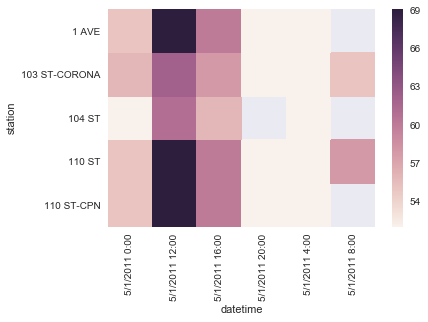

In [52]:
sns.heatmap(df3.head(5))

The heat map provides the contribution of temperature at a particular time with respect to different station